**Step 1: Import Motion Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Motion_Data.zip to Motion_Data.zip


**Step 2: Unzip the file**

In [ ]:
!unzip Motion_Data.zip

Archive:  Motion_Data.zip
   creating: Motion_Data/
   creating: Motion_Data/move_circle/
  inflating: Motion_Data/move_circle/move_circle_1748439145.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439148.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439150.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439152.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439154.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439157.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439160.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439163.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439169.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439171.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439175.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439182.npy  
  inflating: Motion_Data/move_circle/move_circle_1748439191.npy  
  inflating: Motion_Data/move_circle/move_circle_174

**Step 3: Motion Gesture Data Preprocessing for Classification Model**

In [22]:
# Import Libaries
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Initialize Variables
data = []
labels = []
label_map = {"move_none": 0, "move_circle": 1, "move_shake": 2, "move_twist": 3}

# Load & Process the numpy motion files
for label_name in os.listdir("Motion_Data"):
    for file in os.listdir(f"Motion_Data/{label_name}"):
        if file.endswith(".npy"):
            sample = np.load(f"Motion_Data/{label_name}/{file}")
            sample = sample.flatten()  # Shape: (300,)
            data.append(sample)
            labels.append(label_map[label_name])

# Convert to arrays & one-hot encode the labels
X = np.array(data)
y = tf.keras.utils.to_categorical(labels, num_classes=4)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Fully Connected Neural Network for Motion Gesture Classification**

In [24]:
# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,)),            # Input layer: accepts 300 features
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 1: 128 neurons, ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer 2: 64 neurons, ReLU activation
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer: 4 classes, Softmax for classification
])

**Step 5: Compiling and Training the Gesture Classification Model**

In [25]:
# Compiling the Model
model.compile(
    optimizer='adam',                 # Uses the Adam optimizer — a popular choice for training neural networks efficiently.
    loss='categorical_crossentropy',  # Appropriate for multi-class classification problems with one-hot encoded labels.
    metrics=['accuracy']              # The model will track accuracy during training and validation.
)

# Training the Model
model.fit(
    X_train, y_train,                 # Training data and labels.
    validation_data=(X_val, y_val),   # Validation data to evaluate model performance after each epoch.
    batch_size=1,                     # Model updates weights after each training sample.
    epochs=15                         # Model will go through the entire training dataset 15 times.

)

Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4460 - loss: 1.5248 - val_accuracy: 0.9250 - val_loss: 0.5311
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9991 - loss: 0.1025 - val_accuracy: 0.9250 - val_loss: 0.4926
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.9000 - val_loss: 0.5141
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.9000 - val_loss: 0.5295
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9000 - val_loss: 0.5317
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9000 - val_loss: 0.5515
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8750 - val_loss: 0.5598
Epoch 8/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.

**Step 6: Converting and Saving the Gesture Classification Model in TensorFlow Lite Format**

In [27]:
# Convert the Keras Model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)   # Creates a converter for your trained Keras model.
tflite_model = converter.convert()                            # Converts the model to TensorFlow Lite format

# Save the Converted Model to a File
with open("motion_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp9v4famvi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133771255888400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133771255887056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133771255303440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133771255303824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133771255303248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133771255302288: TensorSpec(shape=(), dtype=tf.resource, name=None)


**Step 7: Visualizing Raw Sensor Data for Each Motion Gesture Class**

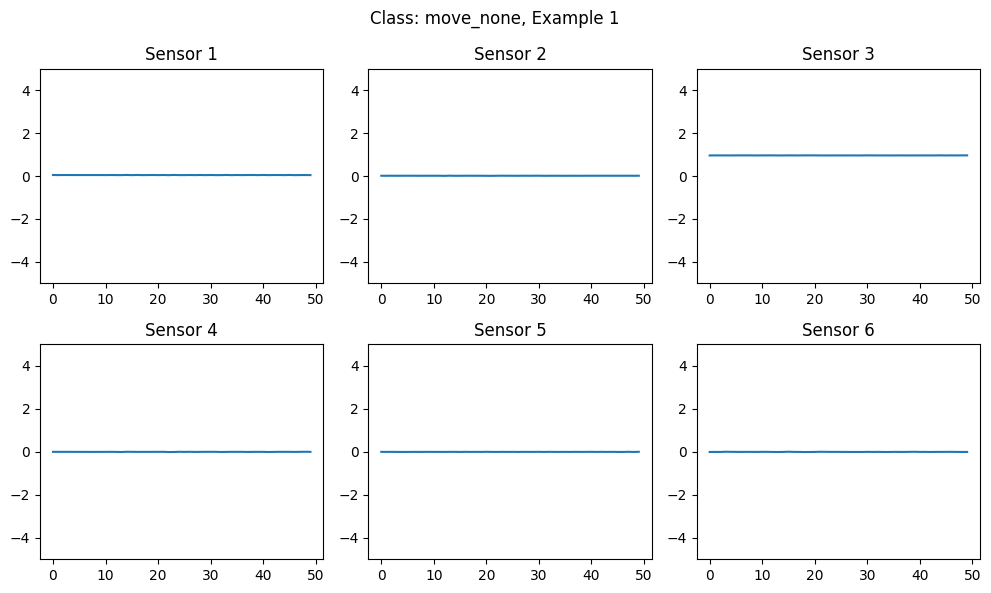

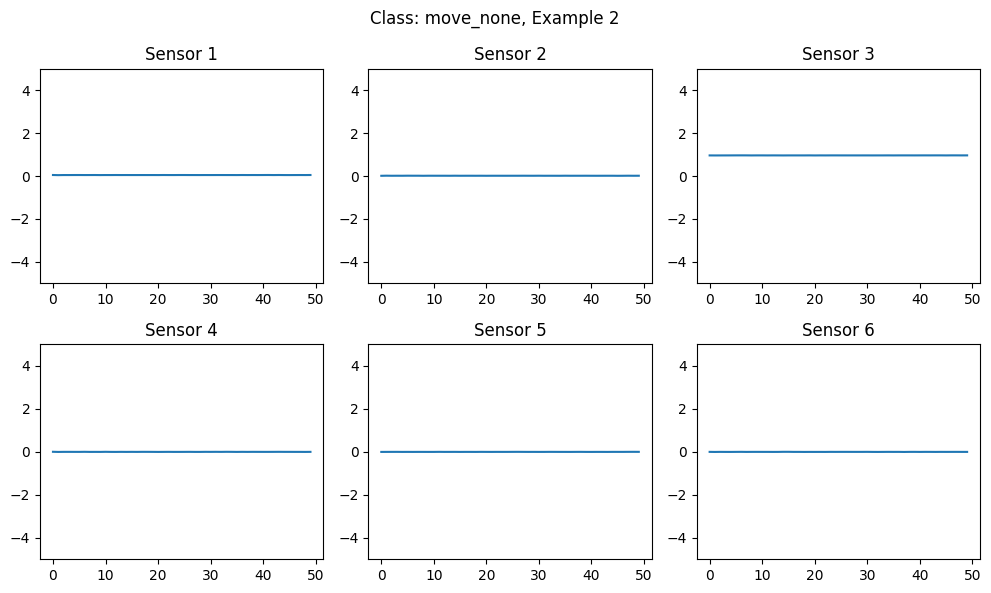

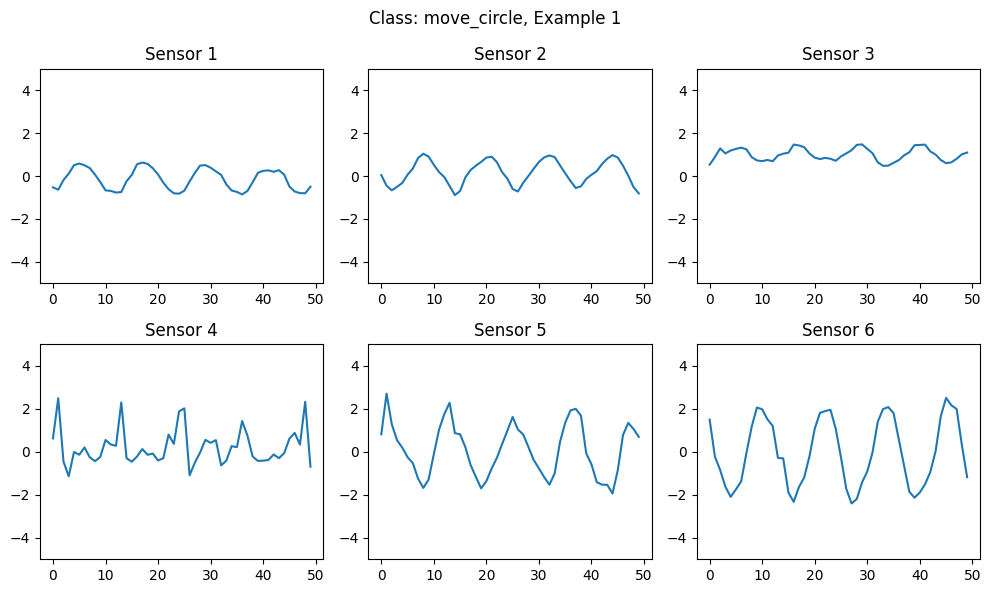

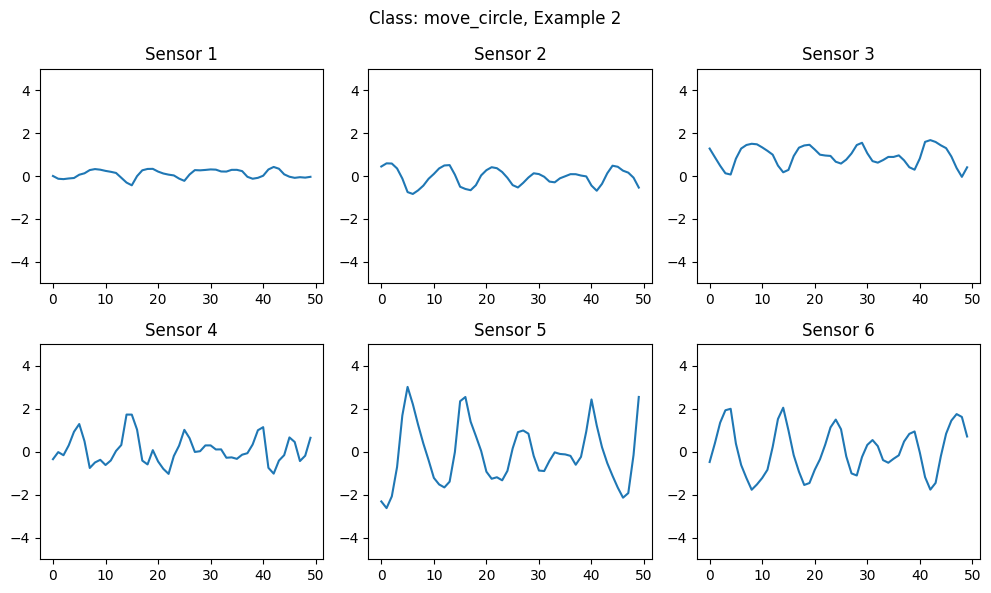

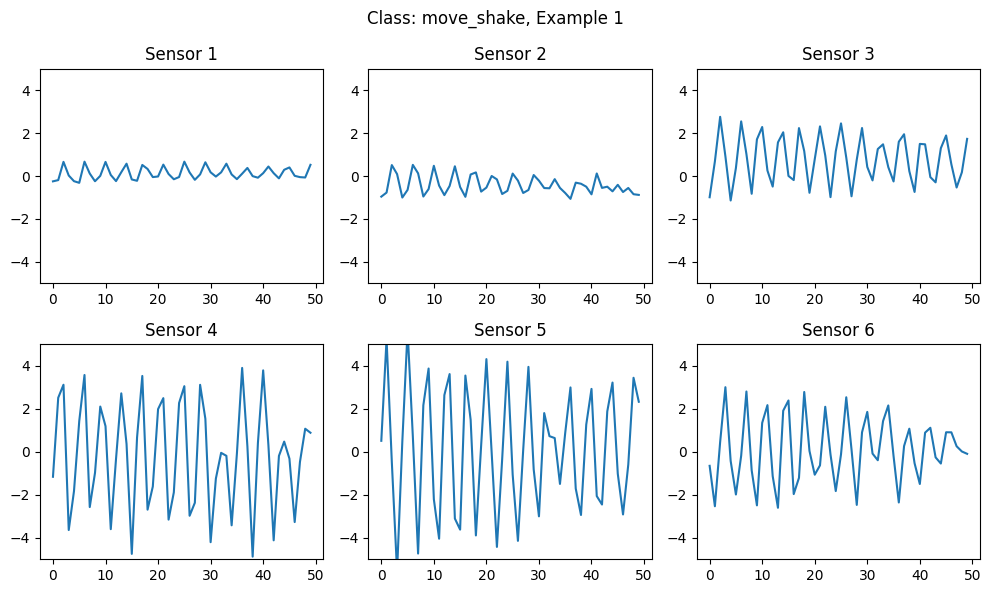

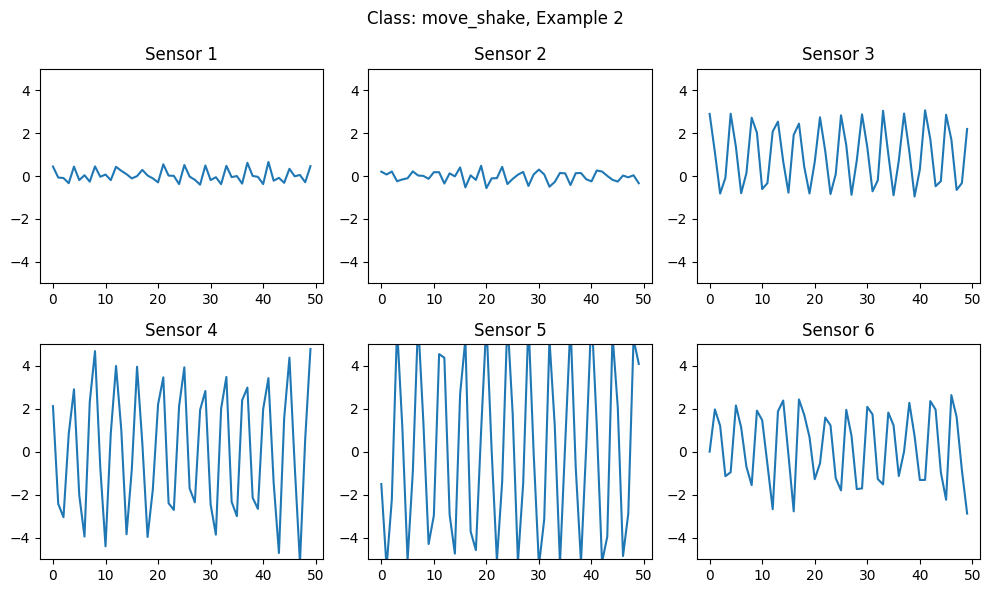

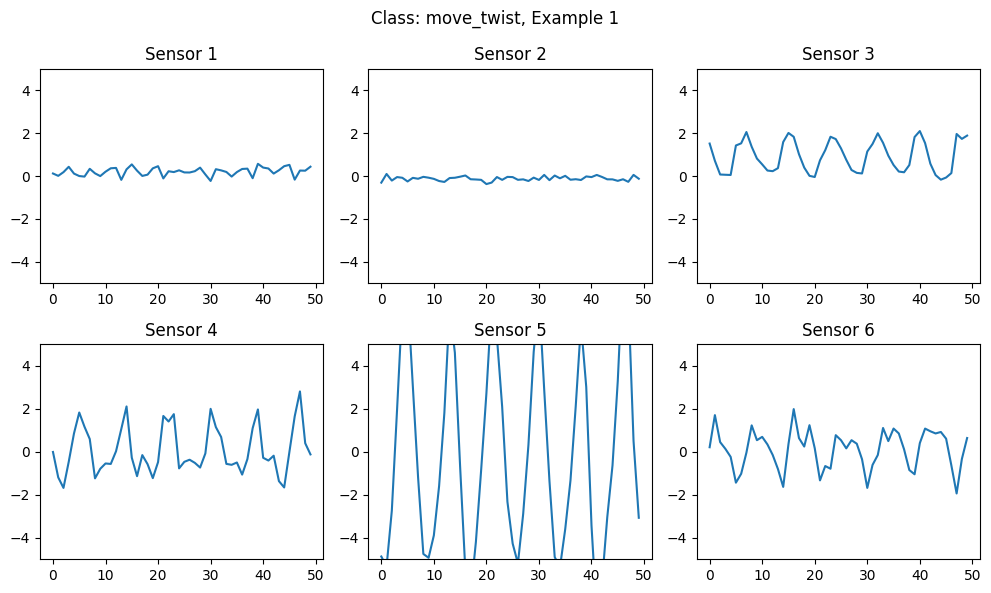

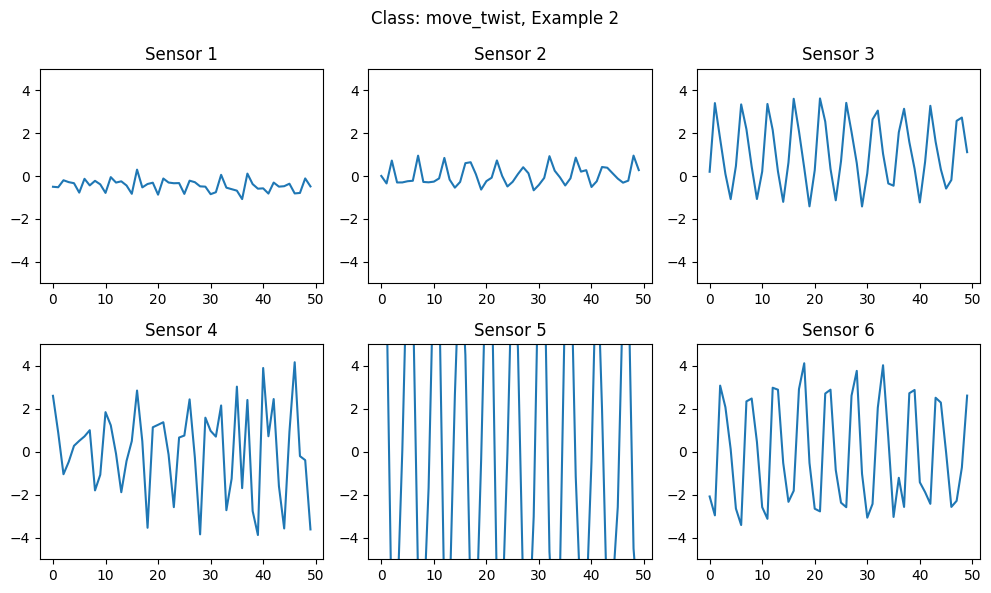

In [29]:
# Setup for Plotting
import matplotlib.pyplot as plt

num_examples_per_class = 2  # Number of examples to show for each gesture class
y_min = -5
y_max = 5

# Create a reverse label map
label_map_inv = {0: "move_none", 1: "move_circle", 2: "move_shake", 3: "move_twist"}

# Loop through each class and plot examples
for label in range(4):
    class_files = [f for f in os.listdir(f"Motion_Data/{label_map_inv[label]}") if f.endswith(".npy")]
    for i in range(min(num_examples_per_class, len(class_files))):
        file_path = f"Motion_Data/{label_map_inv[label]}/{class_files[i]}"
        sample = np.load(file_path)

# Plot the 6 sensor signals
        plt.figure(figsize=(10, 6))
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.plot(sample[:, j])
            plt.ylim(y_min, y_max)
            plt.title(f"Sensor {j+1}")
        plt.suptitle(f"Class: {label_map_inv[label]}, Example {i+1}")
        plt.tight_layout()
        plt.show()
